## Notebook for Regression Lesson - Car Price Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.1 Data Preparation

Before using any data to start a machine learning model, we need to clean the data and perform an EDA to understand the characteristics of the dataset.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [4]:
df.shape

(11914, 16)

In [5]:
# Change the columns name to lower and replace space with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
# Now for each text column, apply the same logic, lower text and replace space with underscore

text_col = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for col in text_col:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.2 EDA

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

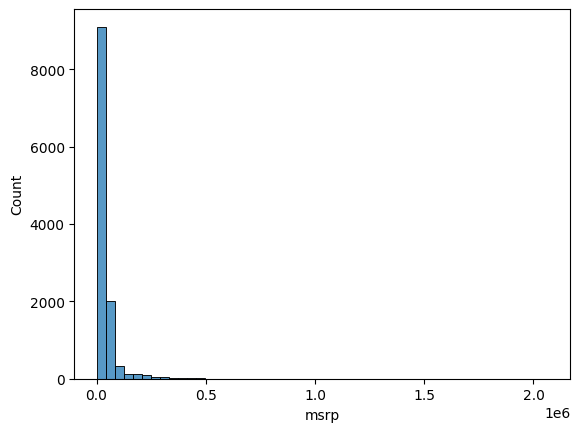

In [11]:
# Distribution of car price
sns.histplot(df.msrp, bins=50)

Car price is not distributed evenly, there is a long tail on the right indicating that there are only a few cars with very high price (up to 2m). The majority of car is priced at below 150k. To see the distribution of the majority, we can zoom in and focus only on the proportion of car priced at below 200k.

<Axes: xlabel='msrp', ylabel='Count'>

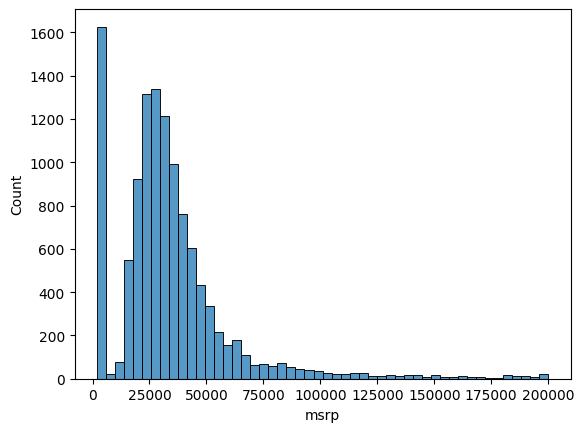

In [12]:
sns.histplot(df.msrp[df.msrp < 200000], bins=50)

The distribution of price is better, but still skewed with a long tail. To converse the distribution to a normal-like, we need to apply log function to price. To do so, use function np.log1p.

In [13]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

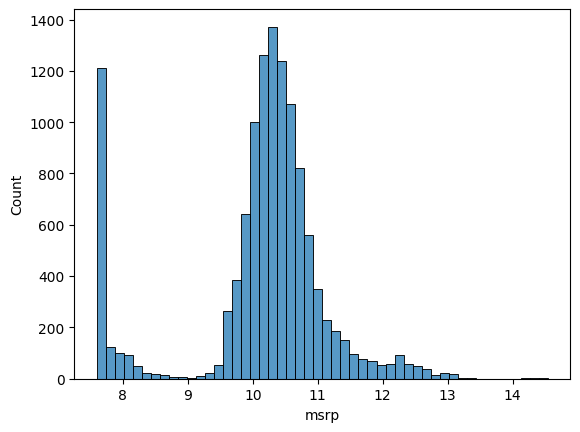

In [14]:
sns.histplot(price_logs, bins=50)

The price distribution becomes more normally distributed with 2 tails and a centre. However, there is still a huge spike of car being priced at 1000. This is the characteristic of the data that need to be taken into account when training model. 

In [15]:
# Missing values

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.3 Train, test, validation split

In order to train and evaluate the model, we need to split data into train, test, and validation portion. Train data will be used to train the model and validation set will be used to evaluate the model performance. Finally, the model with best performance will be tested against using the test data set to ensure that it is not lucky that the model has the best performance.

In [16]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [17]:
n_train, n_val, n_test

(7150, 2382, 2382)

To split the data, we first need to shuffle the data in order to get a balanced split for each train, test and validation data set. Then we split the data into the ratio 60 : 20 : 20.

In [18]:
idx = np.arange(n)

In [19]:
np.random.seed(42)
np.random.shuffle(idx)

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [21]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3995,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
7474,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
7300,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650
3148,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170
747,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,2000


In [22]:
# Extract the target from each data set

y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [23]:
# Remove the target from data set to prevent data leakage

del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [24]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

In [25]:
y_train[:5]

array([10.29876764, 10.32535081, 10.53611479,  9.69097479,  7.60140233])

## 2.4 Liner Regression
Linear regression is finding a function g(x) that can approximates y with the lowest error (error to be defined). In this section, we try to define a simply function for one observation.

In [26]:
df_train.iloc[6]

make                                           ford
model                                          flex
year                                           2016
engine_fuel_type     premium_unleaded_(recommended)
engine_hp                                     365.0
engine_cylinders                                6.0
transmission_type                         automatic
driven_wheels                       all_wheel_drive
number_of_doors                                 4.0
market_category                           crossover
vehicle_size                                  large
vehicle_style                                 wagon
highway_mpg                                      21
city_mpg                                         15
popularity                                     5657
Name: 4759, dtype: object

In [35]:
xi = [365, 15, 56] # vector xi of the observation, contain the variables used in our model
w0 = 7.17 # bias or w0
w = [0.01, 0.04, 0.002] # weight for each features of xi

In [29]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred += xi[j] * w[j]

    return pred

In [36]:
linear_regression(xi)

11.532

In [39]:
np.expm1(linear_regression(xi))

np.float64(101924.76161830177)

In the vector form, we can use dot product operation to perform the calculation of the linear regression. Essentially this would replace the need to add xi[j] * w[j] each time.

In [41]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res += xi[j] * w[j]

    return res